In [1]:
#dataframes
import pandas as pd
import h5py

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math as m
from scipy.spatial.distance import cdist
from scipy import signal

#plots
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
from figurefirst import FigureLayout,mpl_functions
import figurefirst
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

#misc
import cairosvg
import time
np.set_printoptions(suppress=True)
# matplotlib.rcParams['font.family'] = [ 'sans-serif']

In [2]:
FS=7

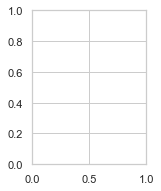

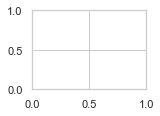

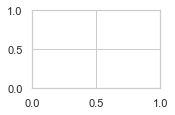

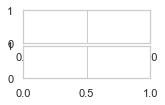

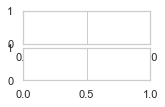

In [3]:
layout = fifi.svg_to_axes.FigureLayout('../../../Figure/Paper/method2.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

In [4]:
img1 = mpimg.imread('../../../Figure/Paper/MethodFigure02/JaleesaCropped.png')
img2 = mpimg.imread('../../../Figure/Paper/MethodFigure02/topview.png')

### Panel 1


In [5]:
ax1=layout.axes[('fig1','a')]
ax1.imshow(img1,aspect='auto',rasterized=True)
ax1.grid(False)
ax1.axes.axis('off')

ax1.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax1, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/Paper/method2.svg')

### Panel 2

In [6]:
ax2=layout.axes[('fig2','b')]
ax2.imshow(img2, aspect='auto', rasterized=True)
ax2.grid(False)
ax2.axes.axis('off')

ax2.set_rasterization_zorder(-20)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/Paper/method2.svg')

### Panel 3


In [7]:
odor=pd.read_hdf('~/Documents/Myfiles/DataAnalysis/data/Sprints/HighRes/Forest/ForestDataJuly_S1.h5')
loc=pd.read_hdf('~/Documents/Myfiles/DataAnalysis/data/ForestSensorLocations.h5')

from shapely.geometry import Point
from geopy import distance
import geopandas as gpd
import utm
import datetime as dt


odor['geometry'] = odor.apply(lambda row: Point(row.lon, row.lat), axis=1)

geodf = gpd.GeoDataFrame(odor)
geodf.crs= {'init': 'epsg:4326'}
# change the projection of geodf
geodf = geodf.to_crs("+proj=utm +zone=11 +ellps=WGS84 +datum=WGS84 +units=m +no_def")

geodf["x"] = geodf.geometry.apply(lambda row:row.x)
geodf["y"] = geodf.geometry.apply(lambda row:row.y)

#source location to meters
source =(39.252441,-119.878037)
u =  utm.from_latlon(39.252441, -119.878037)
xfromsrc= geodf.x-u[0]
geodf.insert(4,'xsrc',xfromsrc) 

yfromsrc = geodf.y-u[1]
geodf.insert(5,'ysrc', yfromsrc)

In [8]:
traj=geodf
traj.xsrc=traj.xsrc+8
traj.ysrc = traj.ysrc-8

trajectory=pd.DataFrame()
trajectory['xsrc']=traj.xsrc[100000:150000]
trajectory['ysrc']=traj.ysrc[100000:150000]
trajectory['odor']=traj.odor[100000:150000]

In [9]:
ax=layout.axes[('fig3','c')]

ax.scatter(loc.xsrc, loc.ysrc, marker ='x', s=15, color="blue", 
           label="Wind Sensors", rasterized=True)
ax.scatter(0,0, s=30, color="red", label="Odor Source", rasterized=True)
ax.scatter(trajectory.xsrc, trajectory.ysrc, 
           c=trajectory.odor, cmap='inferno', s=0.01,alpha=0.2, rasterized=True)
ax.grid(False)
ax.set_rasterization_zorder(-20)
ax.ticklabel_format(useOffset=False)
ax.autoscale(enable=True)
ax.set_xlim(-30,20)

# ax.set_xlabel('Longitude, m',labelpad=-7)
# ax.set_ylabel('Latitude, m', labelpad=-9)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[-35,5],
                           xticks=[-30,20],
                           linewidth=0.5)




figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../../Figure/Paper/method2.svg')


### Panel 4

In [10]:
df = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/WindData/Forest/windgpsdata.hdf")
time =df.time-df.time[0]
df['time']=time

In [11]:
ax1=layout.axes[('figws','ws1')]
ax2=layout.axes[('figws','ws2')]

ax1.scatter(df.time,df.S2_1, label='Station01', c='sandybrown', edgecolors='none', alpha=0.2,s=4,rasterized=True)
ax2.scatter(df.time,df.S2_2, label='Station05', edgecolors='none', alpha=0.2, s=3,rasterized=True)
ax2.scatter(df.time,df.S2_3, label='Station06', edgecolors='none', alpha=0.2, s=3,rasterized=True)
ax2.scatter(df.time,df.S2_5, label='Station07', edgecolors='none', alpha=0.2, s=3,rasterized=True)
ax2.scatter(df.time,df.S2_6, label='Station08', edgecolors='none', alpha=0.2, s=3,rasterized=True)
ax2.scatter(df.time,df.S2_8, label='Station09', edgecolors='none', alpha=0.2, s=3,rasterized=True)
ax2.scatter(df.time,df.S2_9, c='green', label='Station09', edgecolors='none', alpha=0.2, s=3,rasterized=True)

ax1.set_rasterization_zorder(-20)
ax2.set_rasterization_zorder(-20)

ax1.grid(False)
ax2.grid(False)

mpl_functions.adjust_spines(ax1,['left'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
#                             xticks=[0,2000,4000,6000,8000,10000,12000],
                            yticks=[0,5,10],
                            linewidth=0.5)
                                 
mpl_functions.adjust_spines(ax2,['left'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
#                             xticks=[0,40000,80000],
                            yticks=[0,5,10],
                            linewidth=0.5)

ax1.set_title('Forest Wind Speed', pad=1)




figurefirst.mpl_functions.set_fontsize(ax1, FS)
figurefirst.mpl_functions.set_fontsize(ax2, FS)

layout.append_figure_to_layer(layout.figures['figws'], 'figws', cleartarget=True)
layout.write_svg('../../../Figure/Paper/method2.svg')


In [12]:
ax3=layout.axes[('figwd','wd1')]
ax4=layout.axes[('figwd','wd2')]

ax3.scatter(df.time ,df.D_1, label='Station01',  c='sandybrown', edgecolors='none', alpha=0.2,s=4,rasterized=True)
ax4.scatter(df.time ,df.D_2, label='Station05', edgecolors='none', alpha=0.2,s=3,rasterized=True)
ax4.scatter(df.time ,df.D_3, label='Station06', edgecolors='none', alpha=0.2, s=3,rasterized=True)
ax4.scatter(df.time ,df.D_5, label='Station07', edgecolors='none', alpha=0.2, s=3,rasterized=True)
ax4.scatter(df.time ,df.D_6, label='Station08', edgecolors='none', alpha=0.2,s=3,rasterized=True)
ax4.scatter(df.time ,df.D_8, label='Station09', edgecolors='none', alpha=0.2,s=3,rasterized=True)
ax4.scatter(df.time ,df.D_9, c='green', label='Station09', edgecolors='none', alpha=0.2, s=3,rasterized=True)



ax3.set_rasterization_zorder(-20)
ax4.set_rasterization_zorder(-20)
ax3.grid(False)
ax4.grid(False)

mpl_functions.adjust_spines(ax3,['left'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            yticks=[0,180,360],
                            linewidth=0.5)
                                 
mpl_functions.adjust_spines(ax4,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=[0,14000],
                            yticks=[0,180,360],
                            linewidth=0.5)


ax3.set_title('Forest Wind Direction', pad=0)
# ax4.set_xlabel('Time, s', labelpad=-5)


figurefirst.mpl_functions.set_fontsize(ax3, FS)
figurefirst.mpl_functions.set_fontsize(ax4, FS)

layout.append_figure_to_layer(layout.figures['figwd'], 'figwd', cleartarget=True)
layout.write_svg('../../../Figure/Paper/method2.svg')

In [127]:
# layout = fifi.svg_to_axes.FigureLayout('../../../Figure/Paper/method2.svg',
#                                            autogenlayers=True, make_mplfigures=True, hide_layers=[])

In [187]:
cairosvg.svg2pdf(url='../../../Figure/Paper/method2.svg', write_to='../../../Figure/Paper/method2.pdf')